In [1]:
import numpy as np

q=9.522
de=0.00403
A=0.00953
delT=12.89
Kp=0.2 
delP=82.9
rho=998.2
v= 0.13392
le= 0.479


Nussulut_number = (q*de)/(A*delT*Kp)
skin_friction_factor = (2*de*delP)/(rho*v*v*le)
Nu_f= Nussulut_number/ skin_friction_factor
print(f'average nussulat number = {Nussulut_number:.4f}')
print(f'skin friction factor = {skin_friction_factor:.6f}')
print(f'Nu/f value = {Nu_f:.6f}')

average nussulat number = 1.5619
skin friction factor = 0.077919
Nu/f value = 20.045265


In [2]:
import pandas as pd

In [3]:
file1= pd.read_csv('Nu-delP.csv')
file1['percentage change']= ((file1['melting-time'] - 2445)/2445)*100
file2= file1.loc[:7]
file3 = pd.concat([file1.iloc[:2], file1.iloc[-4:]])
file3

,model,flux,pressure drop,nussult number,hydraulic diameter,melting-time,percentage change
0,base,8.1634,37.90,1.4800,3.9048,2445.0,0.000000
1,circular,8.7736,25.08,2.2311,4.8000,2266.3,-7.308793
8,R-2,8.3150,65.94,1.5330,3.7600,2417.2,-1.137014
9,R-3,9.1857,70.70,1.5859,3.9800,2111.1,-13.656442
10,R-3.5,9.4780,82.90,1.5608,4.0300,2060.0,-15.746421
11,R-4,8.3860,87.50,1.1506,3.2300,2418.4,-1.087935


In [4]:
file4= pd.read_csv('Nu-delP2.csv')
file4['percentage change']= ((file4['melting-time'] - 2445)/2445)*100

In [5]:
import pandas as pd
file1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               12 non-null     object 
 1   flux                12 non-null     float64
 2   pressure drop       12 non-null     float64
 3   nussult number      12 non-null     float64
 4   hydraulic diameter  12 non-null     float64
 5   melting-time        12 non-null     float64
 6   percentage change   12 non-null     float64
dtypes: float64(6), object(1)
memory usage: 804.0+ bytes


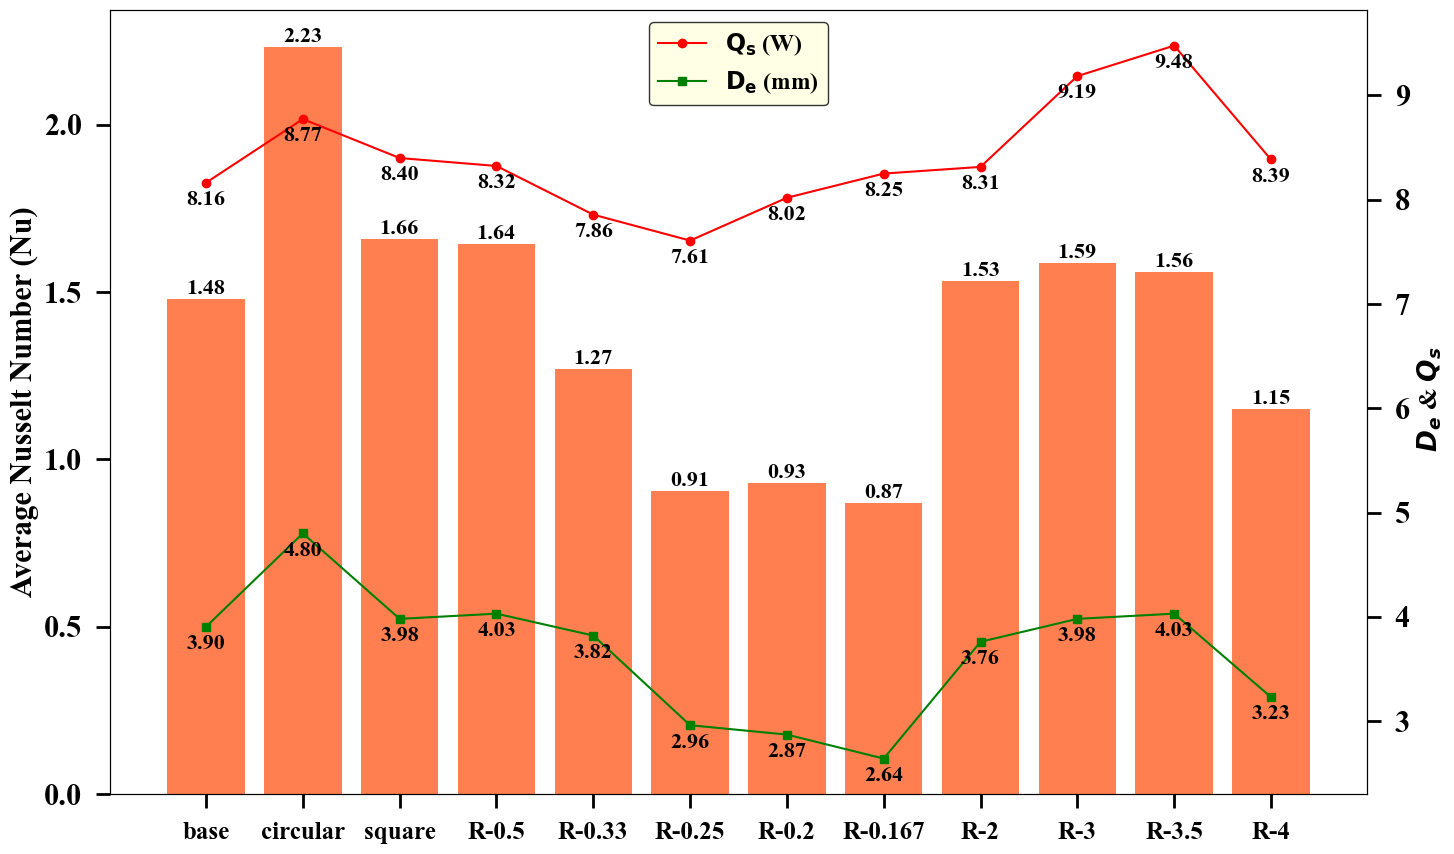

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'bold'

# Increase figure size for better visibility
fig, ax1 = plt.subplots(figsize=(15,9))  # Adjust the figure size here

# Plot the bar chart (Nusselt number)
bars = ax1.bar(file1['model'], file1['nussult number'], color='coral', label='Nusselt Number', zorder=2)

ax1.set_ylabel('Average Nusselt Number (Nu)', fontweight='bold')

ax1.tick_params(axis='y', length=10, width=2, pad=10)
ax1.tick_params(axis='x', length=10, width=2, pad=10, labelsize= 18)

# Annotating bar values right on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=16, zorder=5)

# Create another axis for the line charts (Flux and Hydraulic Diameter)
ax2 = ax1.twinx()

# Plotting both lines (Flux and Hydraulic Diameter) on the same axis
line1, = ax2.plot(file1['model'], file1['flux'], color='red', marker='o', label='Flux', zorder=1)
line2, = ax2.plot(file1['model'], file1['hydraulic diameter'], color='green', marker='s', label='Hydraulic Diameter')

# Setting y-axis label for the second axis
ax2.set_ylabel(r' $D_{e}$ & $Q_{s}$', fontweight='bold', fontsize= 19)
ax2.tick_params(axis='y', length=10, width=2, pad=10)

# Annotating line values slightly below the points (add a small negative offset)
for i, value in enumerate(file1['flux']):
    ax2.text(i, value - 0.08, f'{value:.2f}', ha='center', va='top', fontsize=16, color='black', zorder=5)

# Annotating hydraulic diameter values slightly below the points
for i, value in enumerate(file1['hydraulic diameter']):
    ax2.text(i, value - 0.08, f'{value:.2f}', ha='center', va='top', fontsize=16, color='black', zorder=5)

# Creating a legend for clarity
lines = [line1, line2]
ax2.legend(lines, [r'$ \mathbf{Q_{s}} $ (W)', r'$ \mathbf{D_{e}} $ (mm)'], loc='upper center', 
           fontsize=17, facecolor='lightyellow', frameon=True, edgecolor='black')
#ax1.set_xlim(-0.5, len((file1.index) - 0.5))
# Title and show the plot
plt.savefig('nu-de-q.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

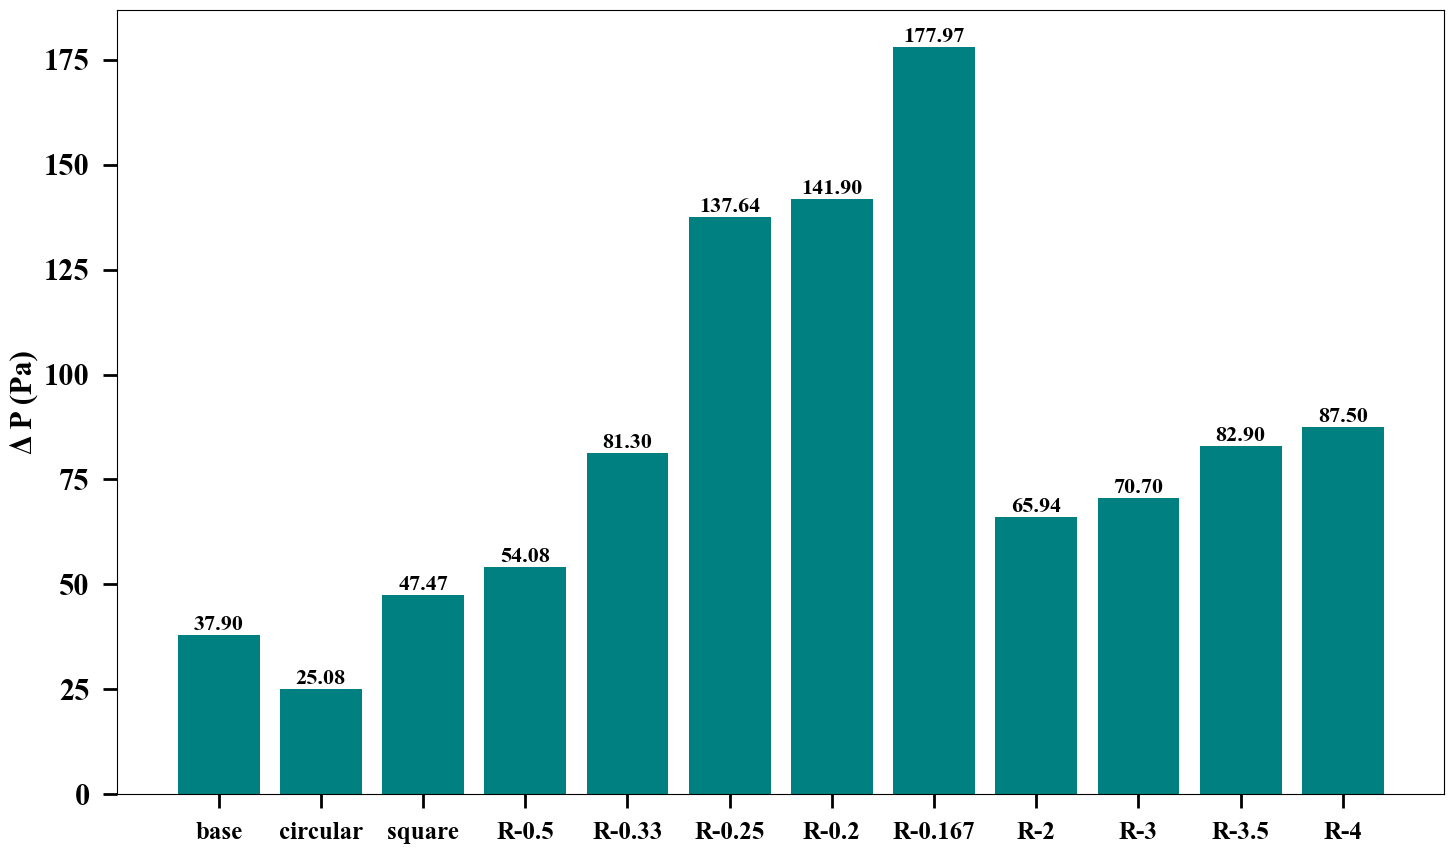

In [7]:
# Set font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'bold'

# Increase figure size for better visibility
fig, ax1 = plt.subplots(figsize=(15,9))  # Adjust the figure size here

# Plot the bar chart (Nusselt number)
bars = ax1.bar(file1['model'], file1['pressure drop'], color='teal', label='Nusselt Number', zorder=2)
ax1.set_xlabel('')
ax1.set_ylabel('Δ P (Pa)', fontweight='bold')




ax1.tick_params(axis='y')

# Annotating bar values right on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=16, zorder=5)

plt.tick_params(axis='y', length=10, width=2, pad=10)
plt.tick_params(axis='x', length=10, width=2, pad=10, labelsize= 18)









# Title and show the plot
plt.savefig('delP.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

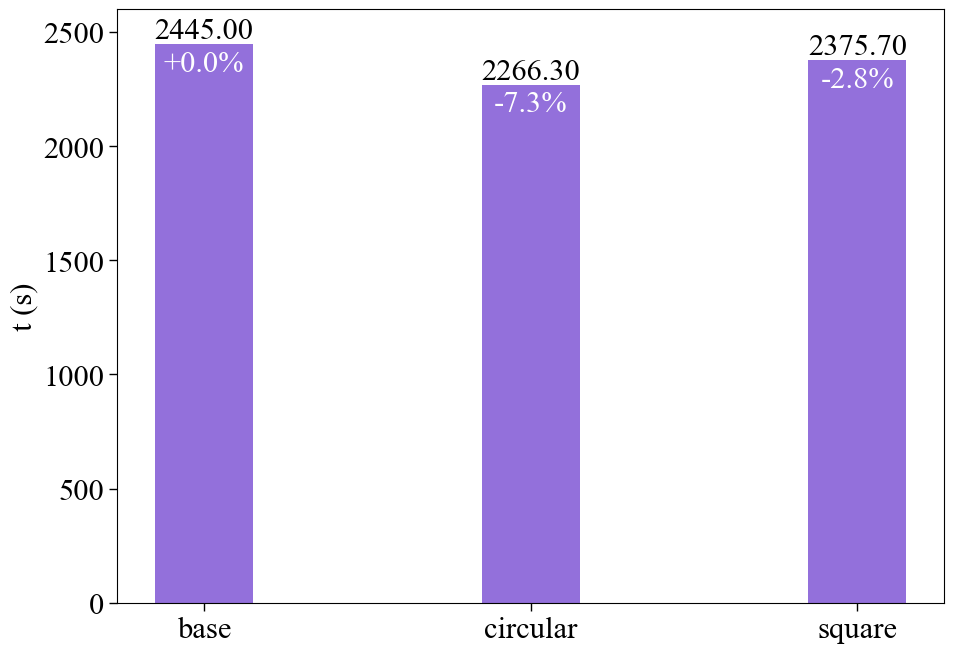

In [8]:
# Set font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'normal'

# Increase figure size for better visibility
fig, ax1 = plt.subplots(figsize=(10,7))  # Adjust the figure size here

# Plot the bar chart (Melting Time) with reduced bar width
bars = ax1.bar(file4['model'], file4['melting-time'], width=0.3, color='mediumpurple', label='Melting Time', zorder=2)

ax1.set_ylabel('t (s)')
ax1.tick_params(axis='y')
plt.tick_params(length=6, width=1)
ax1.set_ylim(0,2600)
# Annotating bar values with melting time above bars and percentage changes just below the end of bars
for bar, pct_change in zip(bars, file2['percentage change']):
    yval = bar.get_height()

    # Display the melting time above the bar
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=22, zorder=5)
    
    # Prepare percentage change with a positive sign for positive values
    pct_text = f'{pct_change:.1f}%' if pct_change < 0 else f'+{pct_change:.1f}%'
    
    # Choose a more visible color, such as light yellow or light green
    annotation_color = 'white'  # You can try 'lightgreen' as an alternative
    
    # Add the percentage change just below the top of the bar
    ax1.text(bar.get_x() + bar.get_width() / 2, yval - 0.01 * yval, pct_text, 
             ha='center', va='top', fontsize=22, color=annotation_color, zorder=5)

plt.tight_layout()

# Title and save the plot
plt.savefig('melting_with_percentage_change1.png', dpi=400, bbox_inches='tight')

plt.show()


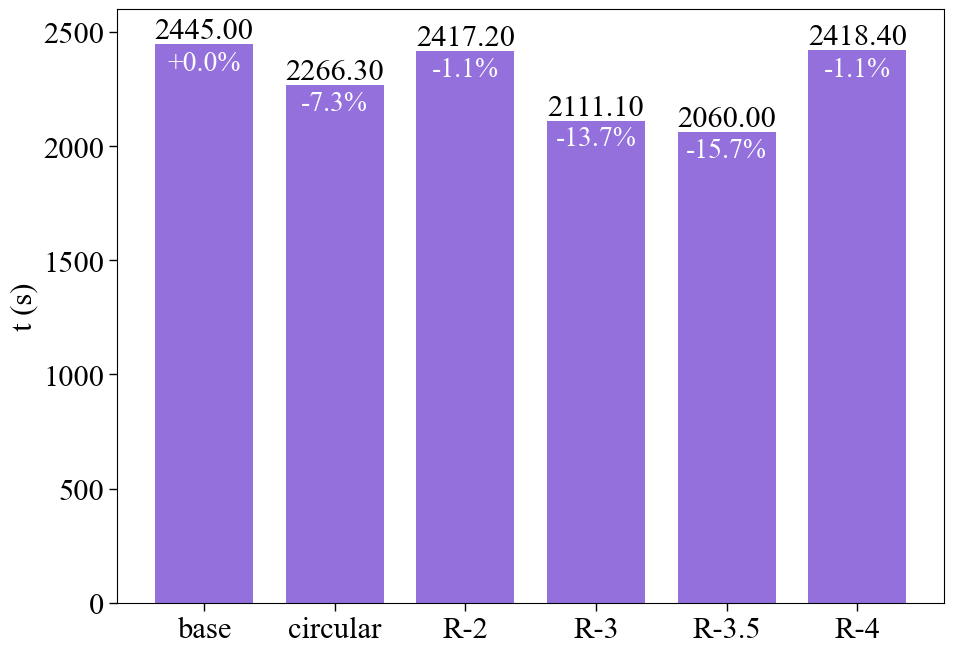

In [12]:
# Set font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'normal'

# Increase figure size for better visibility
fig, ax1 = plt.subplots(figsize=(10,7))  # Adjust the figure size here

# Plot the bar chart (Melting Time)
bars = ax1.bar(file3['model'], file3['melting-time'], width=0.75, color='mediumpurple', label='Melting Time', zorder=2)

ax1.set_ylabel('t (s)',)
ax1.tick_params(axis='y')
plt.tick_params(length=6, width=1)
ax1.set_ylim(0,2600)
# Annotating bar values with melting time above bars and percentage changes just below the end of bars
for bar, pct_change in zip(bars, file3['percentage change']):
    yval = bar.get_height()
    
    # Display the melting time above the bar
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=22, zorder=5)
    
    # Prepare percentage change with a positive sign for positive values
    pct_text = f'{pct_change:.1f}%' if pct_change < 0 else f'+{pct_change:.1f}%'
    
    # Choose a more visible color, such as light yellow or light green
    annotation_color = 'white'  # You can try 'lightgreen' as an alternative
    
    # Add the percentage change just below the top of the bar
    ax1.text(bar.get_x() + bar.get_width()/2, yval - 0.01 * yval, pct_text, 
             ha='center', va='top', fontsize=20, color=annotation_color, zorder=5)
plt.tight_layout()
# Title and save the plot
plt.savefig('melting_with_percentage_change2.png', dpi=400, bbox_inches='tight')

plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter, LogLocator
from PIL import Image


img = Image.open('melting_with_percentage_change2.png')
img.save('q1.bmp', format='bmp')